In [1]:
import pandas as pd
import requests
from datetime import date, timedelta
from ml_functions import get_historical_data, get_random_forest_df
from skgarden import RandomForestQuantileRegressor
from plotly.io import write_html
import plotly.express as px
import numpy as np



In [2]:
end_date = date.today().isoformat()

In [3]:
end_date

'2020-01-17'

In [4]:
delta = timedelta(730)

In [5]:
start_date = (date.today() - delta).isoformat()

In [6]:
start_date

'2018-01-17'

In [7]:
url = 'https://api.exchangeratesapi.io/history'


In [8]:
payload = {
    "start_at": start_date,
    "end_at": end_date,
    "symbols": "CNY,JPY,EUR",
    "base": "USD"
}

In [9]:
result = requests.get(url, params = payload).json()

In [10]:
rate_df = pd.DataFrame(result['rates']).transpose()

In [11]:
rate_df = rate_df.sort_index()


In [12]:
rate_df.index = pd.to_datetime(rate_df.index, format = '%Y-%m-%d')

In [13]:
rate_df

,EUR,CNY,JPY
2018-01-17,0.819471,6.435139,110.800623
2018-01-18,0.817327,6.422722,111.213731
2018-01-19,0.815993,6.403998,110.599755
2018-01-22,0.817060,6.403628,110.842389
2018-01-23,0.816393,6.405911,110.498816
...,...,...,...
2020-01-13,0.898796,6.893493,109.877764
2020-01-14,0.899685,6.885830,110.049483
2020-01-15,0.897505,6.887991,109.881529
2020-01-16,0.895335,6.879488,109.947175


In [14]:
btc_price = get_historical_data('BTC', 730)

In [15]:
len(btc_price)

731

In [16]:
btc_price = btc_price.rename(columns = {'close': 'BTC'})
    
    

In [17]:
btc_price.head()

,BTC
Date,
2018-01-17,11162.70
2018-01-18,11175.52
2018-01-19,11521.76
2018-01-20,12783.94
2018-01-21,11549.93


In [18]:
eth_price = get_historical_data('ETH', 730)

In [19]:
eth_price = eth_price.rename(columns = {'close': 'ETH'})

In [20]:
ltc_price = get_historical_data('LTC', 730)

In [21]:
ltc_price = ltc_price.rename(columns = {'close': 'LTC'})

In [23]:
coin_df = btc_price

In [24]:
coin_df['LTC'] = ltc_price

In [25]:
coin_df['ETH'] = eth_price

In [85]:
combined_df = pd.concat([coin_df, rate_df], axis = 1 )

In [86]:
combined_df.head()

,BTC,LTC,ETH,EUR,CNY,JPY
2018-01-17,11162.70,188.21,1024.69,0.819471,6.435139,110.800623
2018-01-18,11175.52,191.03,1012.97,0.817327,6.422722,111.213731
2018-01-19,11521.76,192.27,1037.36,0.815993,6.403998,110.599755
2018-01-20,12783.94,210.68,1150.50,NaN,NaN,NaN
2018-01-21,11549.93,190.73,1049.09,NaN,NaN,NaN


In [87]:
combined_df['EUR'] = combined_df['EUR'].ffill()


In [88]:
combined_df.head()

,BTC,LTC,ETH,EUR,CNY,JPY
2018-01-17,11162.70,188.21,1024.69,0.819471,6.435139,110.800623
2018-01-18,11175.52,191.03,1012.97,0.817327,6.422722,111.213731
2018-01-19,11521.76,192.27,1037.36,0.815993,6.403998,110.599755
2018-01-20,12783.94,210.68,1150.50,0.815993,NaN,NaN
2018-01-21,11549.93,190.73,1049.09,0.815993,NaN,NaN


In [89]:
combined_df['CNY'] = combined_df['JPY'].ffill()


In [90]:
combined_df['JPY'] = combined_df['CNY'].ffill()

In [91]:
combined_df.tail()

,BTC,LTC,ETH,EUR,CNY,JPY
2020-01-13,8106.56,49.64,143.49,0.898796,109.877764,109.877764
2020-01-14,8820.95,58.43,165.66,0.899685,110.049483,110.049483
2020-01-15,8813.21,58.24,166.04,0.897505,109.881529,109.881529
2020-01-16,8719.63,57.51,164.10,0.895335,109.947175,109.947175
2020-01-17,8895.68,61.43,171.04,0.900252,110.109831,110.109831


In [92]:
combined_df.head()

,BTC,LTC,ETH,EUR,CNY,JPY
2018-01-17,11162.70,188.21,1024.69,0.819471,110.800623,110.800623
2018-01-18,11175.52,191.03,1012.97,0.817327,111.213731,111.213731
2018-01-19,11521.76,192.27,1037.36,0.815993,110.599755,110.599755
2018-01-20,12783.94,210.68,1150.50,0.815993,110.599755,110.599755
2018-01-21,11549.93,190.73,1049.09,0.815993,110.599755,110.599755


In [93]:
combined_df = combined_df.reset_index()

In [94]:
combined_df.head()

,index,BTC,LTC,ETH,EUR,CNY,JPY
0,2018-01-17,11162.70,188.21,1024.69,0.819471,110.800623,110.800623
1,2018-01-18,11175.52,191.03,1012.97,0.817327,111.213731,111.213731
2,2018-01-19,11521.76,192.27,1037.36,0.815993,110.599755,110.599755
3,2018-01-20,12783.94,210.68,1150.50,0.815993,110.599755,110.599755
4,2018-01-21,11549.93,190.73,1049.09,0.815993,110.599755,110.599755


In [95]:
delta = timedelta(1)
add_row_date = (date.today() + delta).isoformat()

'2020-01-18'

In [97]:
df2 = pd.DataFrame([[add_row_date,0,0,0,0,0,0]], columns= ['index','BTC','LTC','ETH','EUR','CNY','JPY'])

In [98]:
combined_df = combined_df.append(df2, ignore_index = True)

In [99]:
combined_df = combined_df.set_index('index')

In [102]:
combined_df.tail()

,BTC,LTC,ETH,EUR,CNY,JPY
index,,,,,,
2020-01-14 00:00:00,8820.95,58.43,165.66,0.899685,110.049483,110.049483
2020-01-15 00:00:00,8813.21,58.24,166.04,0.897505,109.881529,109.881529
2020-01-16 00:00:00,8719.63,57.51,164.10,0.895335,109.947175,109.947175
2020-01-17 00:00:00,8895.68,61.43,171.04,0.900252,110.109831,110.109831
2020-01-18,0.00,0.00,0.00,0.000000,0.000000,0.000000


In [56]:
combined_df.tail()

,BTC,LTC,ETH,EUR,CNY,JPY
727,8820.95,58.43,165.66,0.899685,110.049483,110.049483
728,8813.21,58.24,166.04,0.897505,109.881529,109.881529
729,8719.63,57.51,164.10,0.895335,109.947175,109.947175
730,8895.68,61.43,171.04,0.900252,110.109831,110.109831
731,0.00,0.00,0.00,0.000000,0.000000,0.000000


In [ ]:
combined_df.tail()

In [103]:
combined_df['BTC_Previous_Day'] = combined_df['BTC'].shift(1)

In [ ]:
combined_df.tail()

In [104]:
combined_df['LTC_Previous_Day'] = combined_df['LTC'].shift(1)

In [105]:
combined_df['ETH_Previous_Day'] = combined_df['ETH'].shift(1)

In [106]:
combined_df['EUR_Previous_Day'] = combined_df['EUR'].shift(1)

In [107]:
combined_df['CNY_Previous_Day'] = combined_df['CNY'].shift(1)

In [108]:
combined_df['JPY_Previous_Day'] = combined_df['JPY'].shift(1)

In [109]:
combined_df.tail()

,BTC,LTC,ETH,EUR,CNY,JPY,BTC_Previous_Day,LTC_Previous_Day,ETH_Previous_Day,EUR_Previous_Day,CNY_Previous_Day,JPY_Previous_Day
index,,,,,,,,,,,,
2020-01-14 00:00:00,8820.95,58.43,165.66,0.899685,110.049483,110.049483,8106.56,49.64,143.49,0.898796,109.877764,109.877764
2020-01-15 00:00:00,8813.21,58.24,166.04,0.897505,109.881529,109.881529,8820.95,58.43,165.66,0.899685,110.049483,110.049483
2020-01-16 00:00:00,8719.63,57.51,164.10,0.895335,109.947175,109.947175,8813.21,58.24,166.04,0.897505,109.881529,109.881529
2020-01-17 00:00:00,8895.68,61.43,171.04,0.900252,110.109831,110.109831,8719.63,57.51,164.10,0.895335,109.947175,109.947175
2020-01-18,0.00,0.00,0.00,0.000000,0.000000,0.000000,8895.68,61.43,171.04,0.900252,110.109831,110.109831


In [110]:
combined_df = combined_df.drop(columns = ['EUR', 'CNY', 'JPY'])

In [111]:
combined_df = combined_df.dropna()

In [112]:
combined_df.tail()

,BTC,LTC,ETH,BTC_Previous_Day,LTC_Previous_Day,ETH_Previous_Day,EUR_Previous_Day,CNY_Previous_Day,JPY_Previous_Day
index,,,,,,,,,
2020-01-14 00:00:00,8820.95,58.43,165.66,8106.56,49.64,143.49,0.898796,109.877764,109.877764
2020-01-15 00:00:00,8813.21,58.24,166.04,8820.95,58.43,165.66,0.899685,110.049483,110.049483
2020-01-16 00:00:00,8719.63,57.51,164.10,8813.21,58.24,166.04,0.897505,109.881529,109.881529
2020-01-17 00:00:00,8895.68,61.43,171.04,8719.63,57.51,164.10,0.895335,109.947175,109.947175
2020-01-18,0.00,0.00,0.00,8895.68,61.43,171.04,0.900252,110.109831,110.109831


In [114]:
new_df = combined_df.copy()

In [ ]:
new_df = get_random_forest_df()

In [ ]:
new_df

In [ ]:
len(new_df)


In [115]:
X = new_df.drop(columns = ['BTC', 'LTC', 'ETH'])


In [116]:
X.tail()

,BTC_Previous_Day,LTC_Previous_Day,ETH_Previous_Day,EUR_Previous_Day,CNY_Previous_Day,JPY_Previous_Day
index,,,,,,
2020-01-14 00:00:00,8106.56,49.64,143.49,0.898796,109.877764,109.877764
2020-01-15 00:00:00,8820.95,58.43,165.66,0.899685,110.049483,110.049483
2020-01-16 00:00:00,8813.21,58.24,166.04,0.897505,109.881529,109.881529
2020-01-17 00:00:00,8719.63,57.51,164.10,0.895335,109.947175,109.947175
2020-01-18,8895.68,61.43,171.04,0.900252,110.109831,110.109831


In [117]:
y = new_df['BTC']

In [118]:
X_train = X[:725]


In [119]:
y_train = y[:725]

In [120]:
X_test = X[725:]

In [121]:
y_test = y[725:]

In [122]:
regressor = RandomForestQuantileRegressor(random_state = 0, n_estimators = 500)

In [123]:
model = regressor.fit(X_train, y_train)

In [124]:
model.score(X_train, y_train)

0.9968324512421323

In [125]:
model.score(X_test,y_test)

-0.32042931695749943

In [126]:
print(model.feature_importances_)

[0.98578307 0.0039288  0.00351437 0.00328276 0.00176333 0.00172767]


In [127]:
predictions = model.predict(X_test)

In [128]:
predictions

array([8040.93326, 7956.04922, 9082.35994, 9050.9868 , 8867.5391 ,
       9074.53336])

In [129]:
actuals = pd.DataFrame(y_test)

In [130]:
actuals_vs_predictions = actuals.copy()

In [131]:
actuals_vs_predictions['Predictions'] = predictions

In [136]:
actuals_vs_predictions = actuals_vs_predictions.reset_index()

In [137]:
actuals_vs_predictions

,index,BTC,Predictions
0,2020-01-13,8106.56,8040.93326
1,2020-01-14,8820.95,7956.04922
2,2020-01-15,8813.21,9082.35994
3,2020-01-16,8719.63,9050.98680
4,2020-01-17,8895.68,8867.53910
5,2020-01-18,0.00,9074.53336


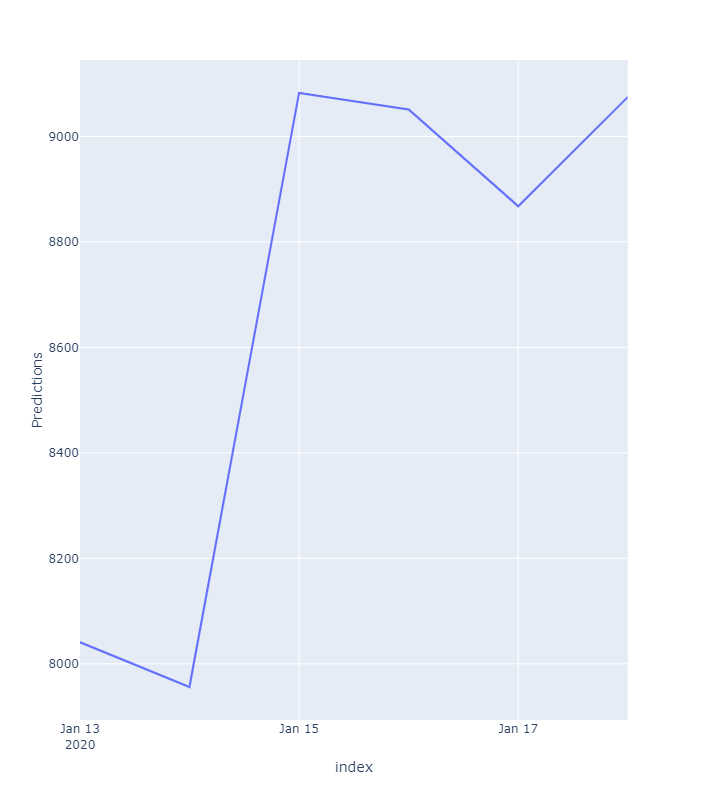

In [141]:
fig = px.line(actuals_vs_predictions, x = 'index', y = 'Predictions')
fig.update_layout(autosize = True, height = 800, width = 950)
fig.update_xaxes(nticks = 5)
fig.update_yaxes(automargin=True)